Goal: Investigate which features are most important and vulnerable to change using random forest with finalised preprocessing code.

In [3]:
import pandas as pd
import numpy as np
import os
import numbers
import pickle
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

Loading the random forest model with auc of 0.929

In [4]:
model_file = os.path.join("fitted_models", "rf_0.929")
pickle_file = open(model_file, "rb")
model = pickle.load(pickle_file)

In [5]:
# Import preprocessed test data
data_dir = os.getcwd()

with open(os.path.join(data_dir, "Processing", r"test_preproc.p"), 'rb') as data_file:
    test_data = pickle.load(data_file)
X_test, y_test = test_data[0], test_data[1]

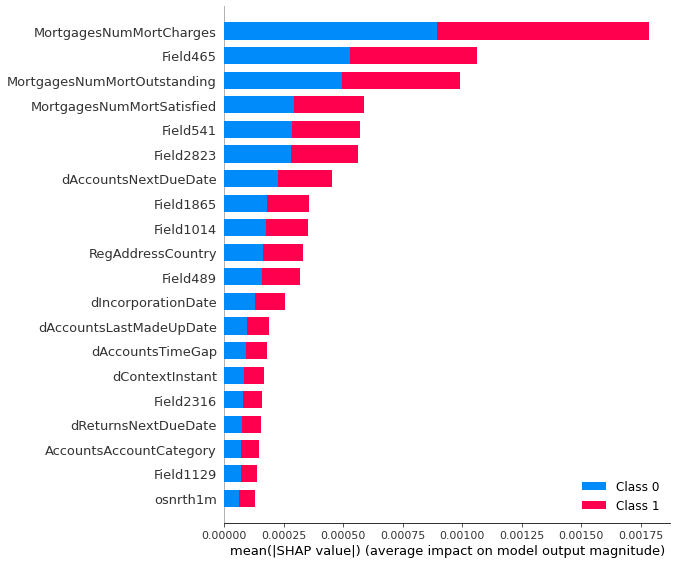

In [6]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")